In [3]:
!pip install pandas

  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]


In [6]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp311-cp311-win_amd64.whl.metadata (115 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------- ------- 6.6/8.1 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.3 MB/s  0:00:00
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached 

ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\juanc\\Desktop\\Cuantica\\Quantum_Kernel_Comparison\\.venv\\Lib\\site-packages\\matplotlib\\tests\\test_agg_filter.py'
Check the permissions.



  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)

   ------------- -------------------------- 1/3 [contourpy]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matp

In [10]:
from PyCSVSummarizer import CSVSummarize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Cargar y preparar los datos
CSVSummarize('../Datasets/hcvdat0.csv')
data = pd.read_csv('../Datasets/hcvdat0.csv')
data = data.dropna()

X = data.drop(columns=['Category', 'Unnamed: 0', 'Sex'])
y = data['Category']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los 3 kernels a probar
kernels = ['linear', 'rbf', 'poly']
kernel_names = {
    'linear': 'Kernel Lineal',
    'rbf': 'Kernel RBF (Radial Basis Function)',
    'poly': 'Kernel Polinomial'
}



Summary of file: hcvdat0.csv

Rows: 615
Columns: 14
----------------------------------------

Column Names:
['', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
----------------------------------------

File Size: 0.04 MB
----------------------------------------
Estimated Data Memory Usage: 0.41 MB
----------------------------------------

Total Null Values: 31

Columns with Nulls (%):
{'ALB': 0.16, 'ALP': 2.93, 'ALT': 0.16, 'CHOL': 1.63, 'PROT': 0.16}
----------------------------------------

Duplicate Rows: 0
----------------------------------------

Top 5 Frequent Values (first 3 columns):
  : {'1': 1, '2': 1, '3': 1, '4': 1, '5': 1}
  Category: {'0=Blood Donor': 533, '3=Cirrhosis': 30, '1=Hepatitis': 24, '2=Fibrosis': 21, '0s=suspect Blood Donor': 7}
  Age: {'46': 32, '48': 28, '33': 25, '51': 24, '52': 22}
----------------------------------------

Unique Values per Column:
{'': 615, 'Category': 5, 'Age': 49, 'Sex': 2, 'ALB': 190,

In [12]:
# Diccionario para almacenar resultados
results = {}


print("COMPARACIÓN DE SVM CON DIFERENTES KERNELS")

# Entrenar y evaluar cada kernel
for kernel in kernels:
    print(f"\n{'=' * 80}")
    print(f"ENTRENANDO SVM CON {kernel_names[kernel].upper()}")
    print(f"{'=' * 80}\n")
    
    # Configuración específica para cada kernel
    if kernel == 'linear':
        svc = SVC(kernel=kernel, C=1, random_state=42)
    elif kernel == 'rbf':
        svc = SVC(kernel=kernel, C=1, gamma='scale', random_state=42)
    elif kernel == 'poly':
        svc = SVC(kernel=kernel, C=1, degree=3, gamma='scale', random_state=42)
    
    # Entrenar el modelo
    svc.fit(X_train_scaled, y_train)
    
    # Realizar predicciones
    y_pred = svc.predict(X_test_scaled)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    
    # Guardar resultados
    results[kernel] = {
        'model': svc,
        'accuracy': accuracy,
        'predictions': y_pred,
        'report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Mostrar resultados
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"\nMatriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


print("RESUMEN COMPARATIVO")


print(f"{'Kernel':<25} {'Accuracy':<15} {'Mejor Performance'}")
print("-" * 80)

best_kernel = max(results.items(), key=lambda x: x[1]['accuracy'])

for kernel in kernels:
    acc = results[kernel]['accuracy']
    is_best = "★ MEJOR" if kernel == best_kernel[0] else ""
    print(f"{kernel_names[kernel]:<25} {acc:.4f} ({acc*100:.2f}%)  {is_best}")



COMPARACIÓN DE SVM CON DIFERENTES KERNELS

ENTRENANDO SVM CON KERNEL LINEAL

Accuracy: 0.9322 (93.22%)

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.98      1.00      0.99        99
0s=suspect Blood Donor       1.00      0.50      0.67         2
           1=Hepatitis       0.60      0.38      0.46         8
            2=Fibrosis       0.33      0.67      0.44         3
           3=Cirrhosis       1.00      0.83      0.91         6

              accuracy                           0.93       118
             macro avg       0.78      0.68      0.69       118
          weighted avg       0.94      0.93      0.93       118


Matriz de Confusión:
[[99  0  0  0  0]
 [ 1  1  0  0  0]
 [ 1  0  3  4  0]
 [ 0  0  1  2  0]
 [ 0  0  1  0  5]]

ENTRENANDO SVM CON KERNEL RBF (RADIAL BASIS FUNCTION)

Accuracy: 0.9068 (90.68%)

Classification Report:
                        precision    recall  f1-score   support

         0

c:\Users\juanc\Desktop\Cuantica\Quantum_Kernel_Comparison\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\juanc\Desktop\Cuantica\Quantum_Kernel_Comparison\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\juanc\Desktop\Cuantica\Quantum_Kernel_Comparison\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

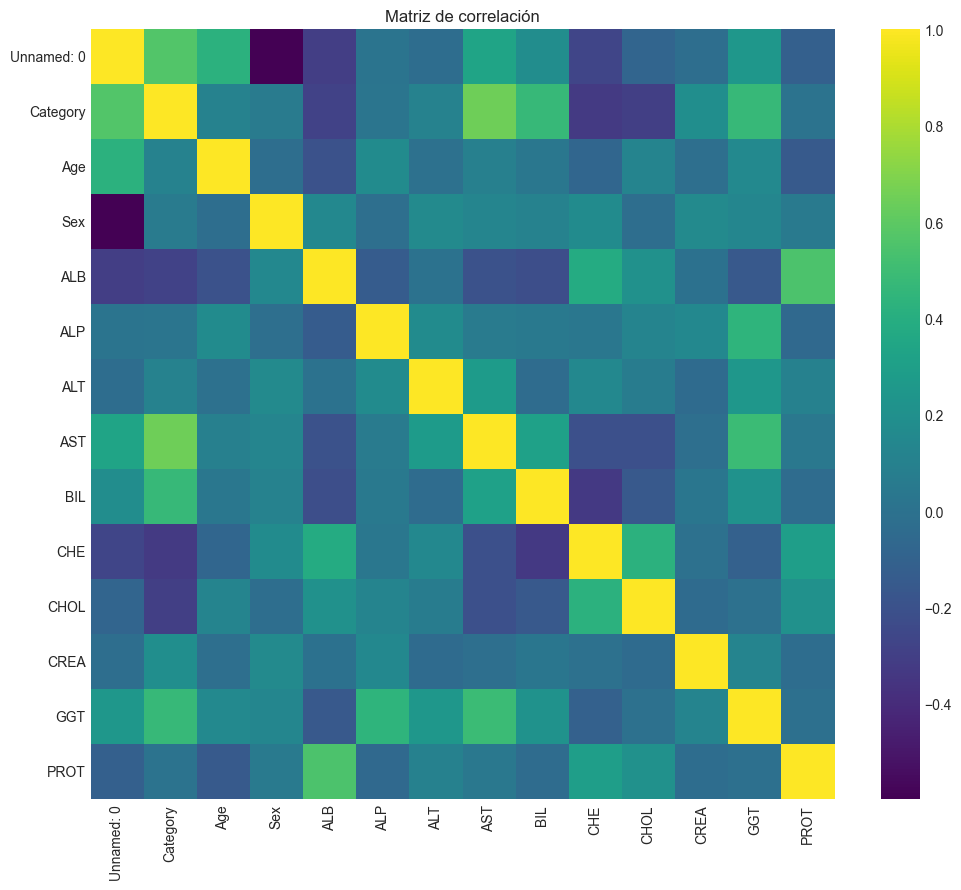

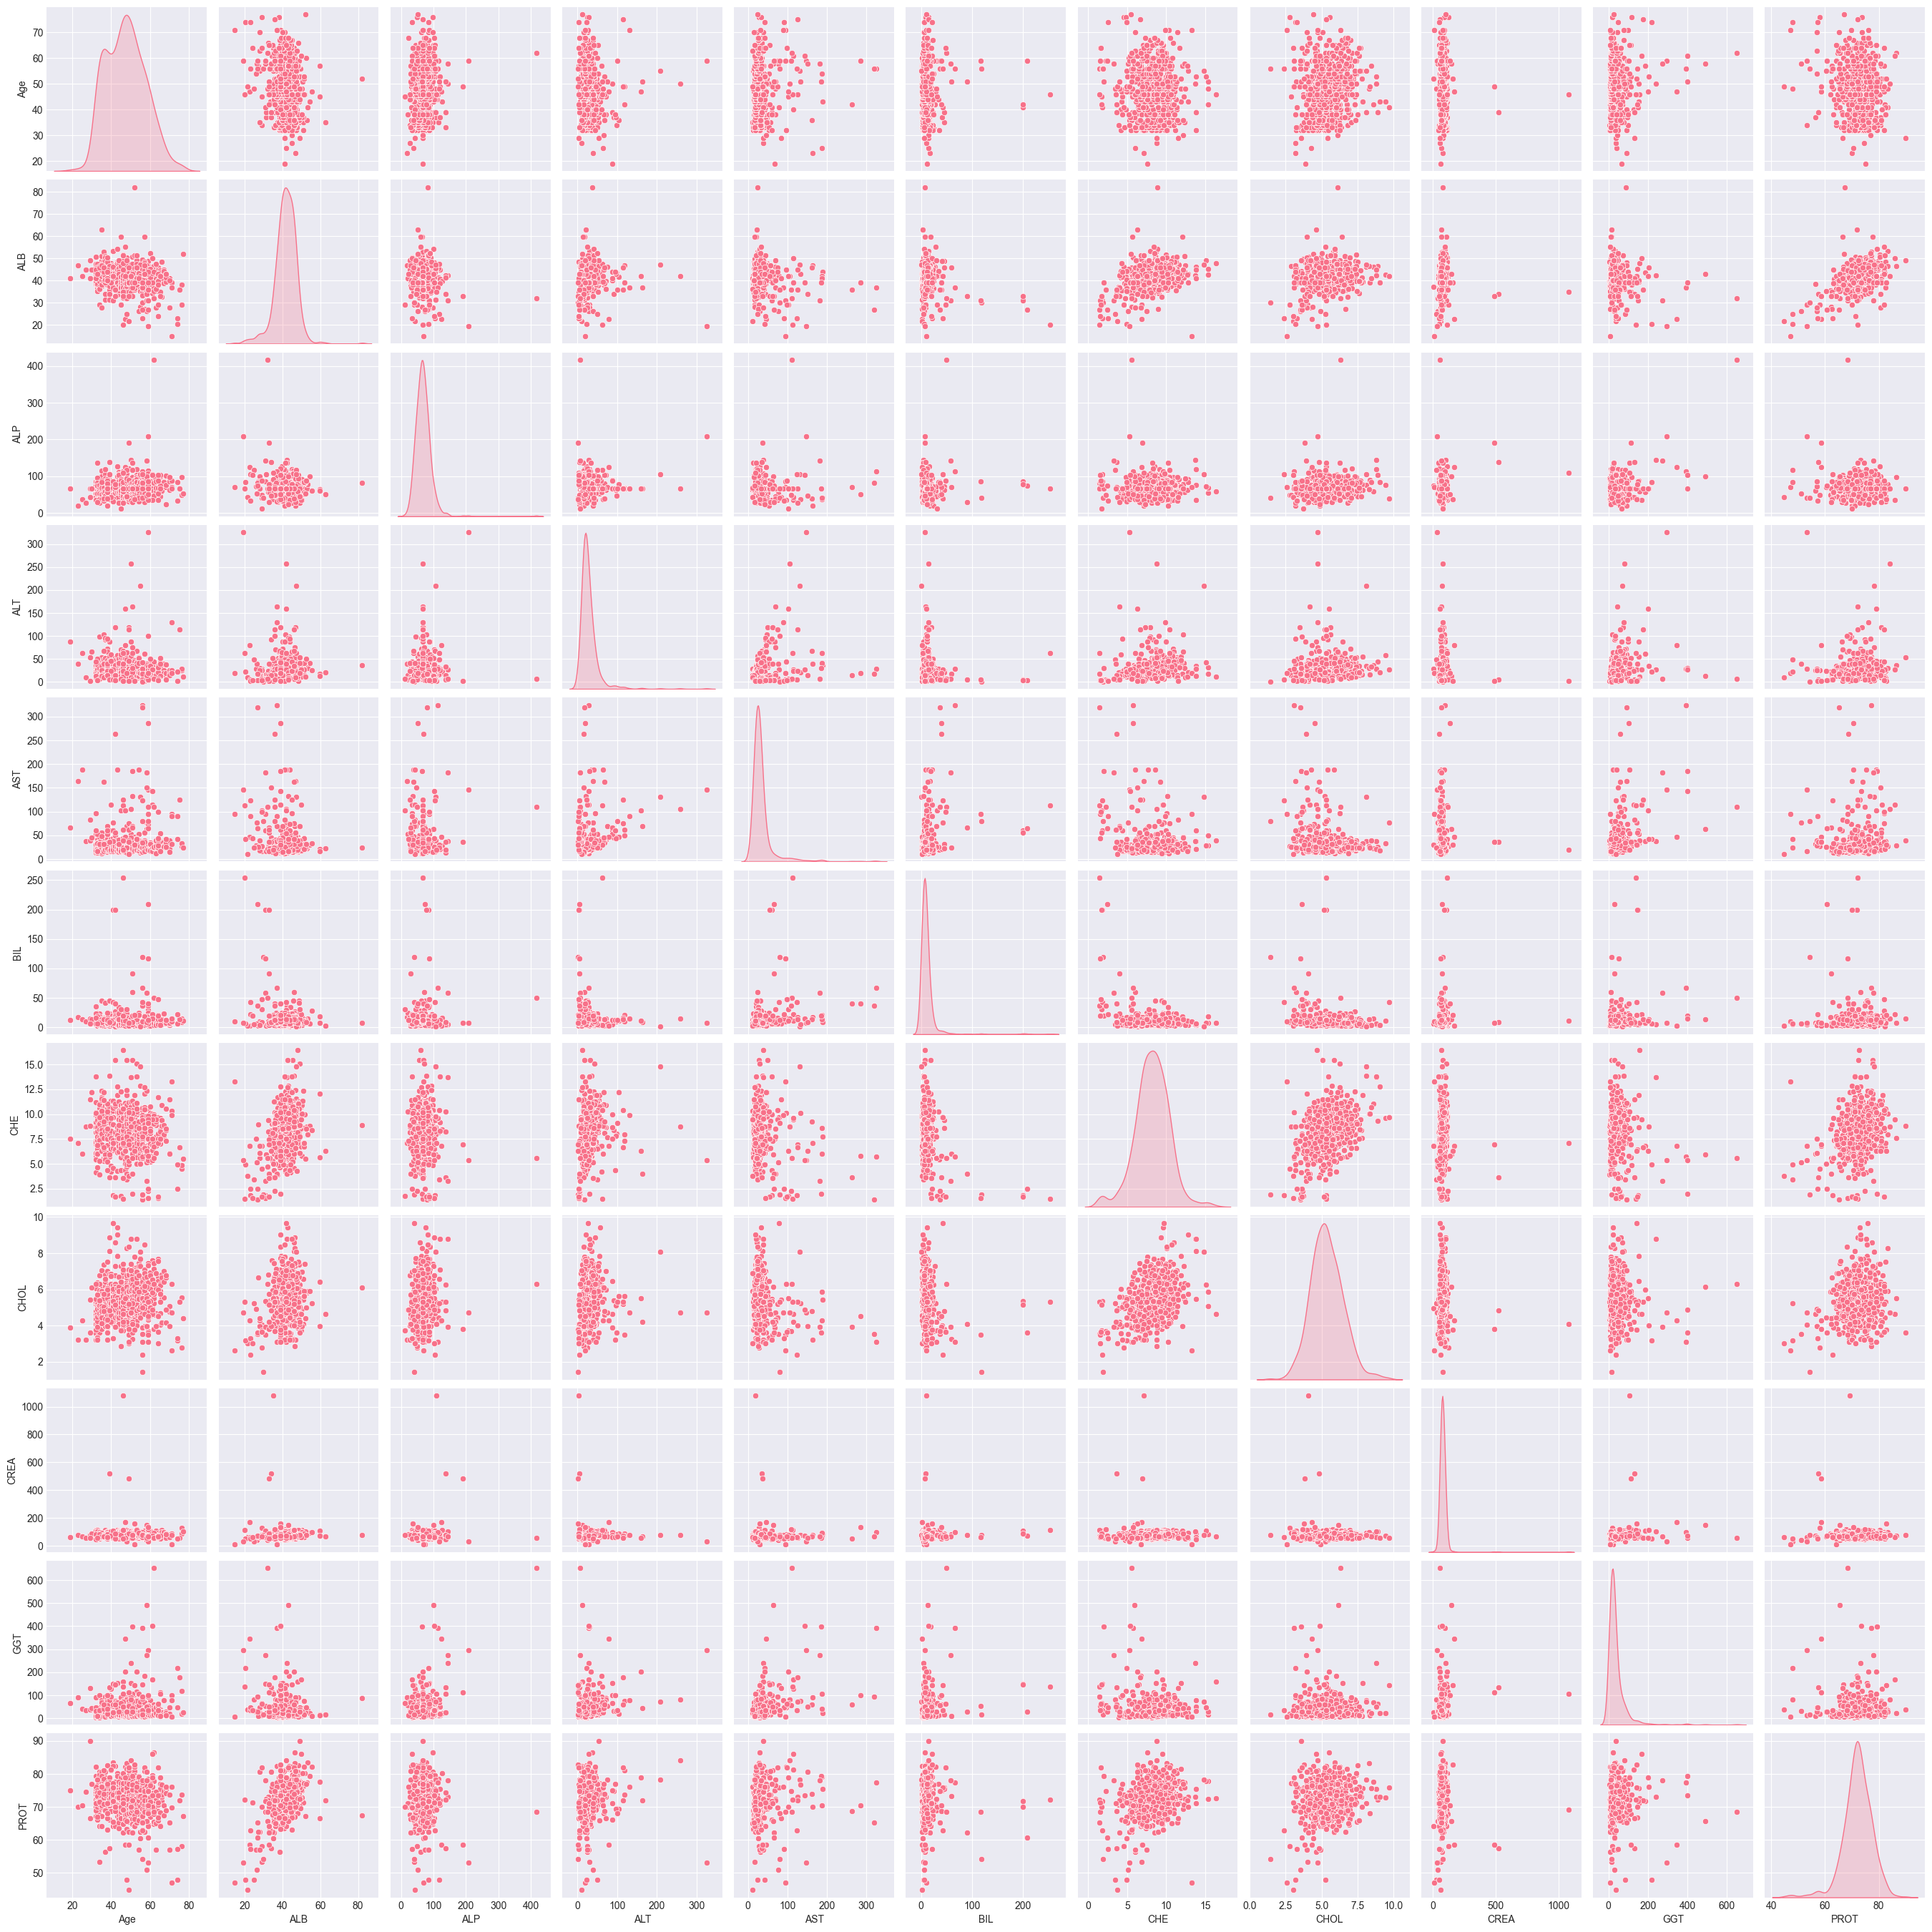

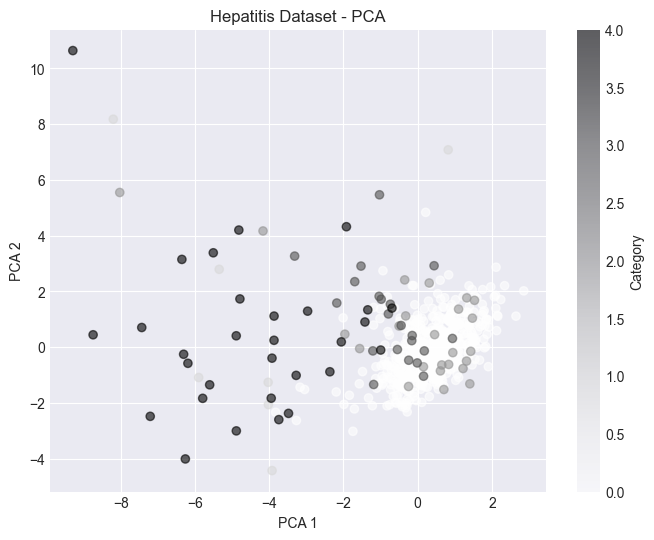

Varianza explicada por cada componente PCA: [0.22379276 0.16524339]


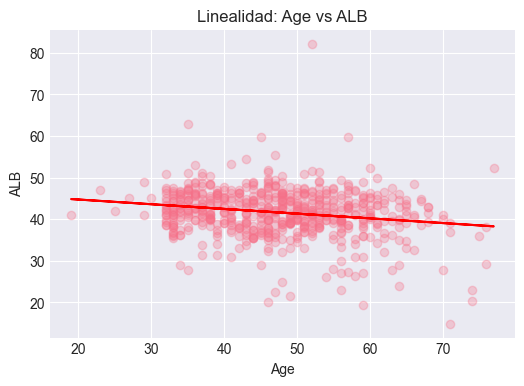

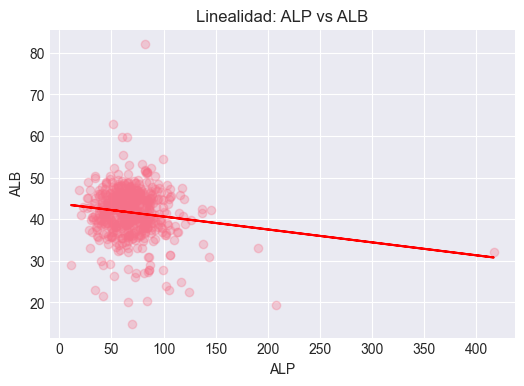

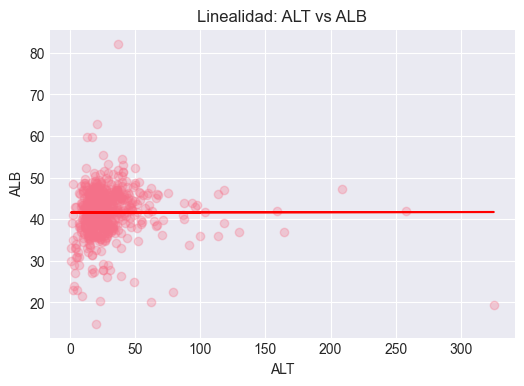

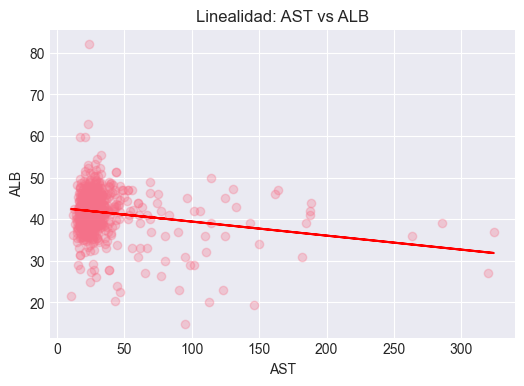

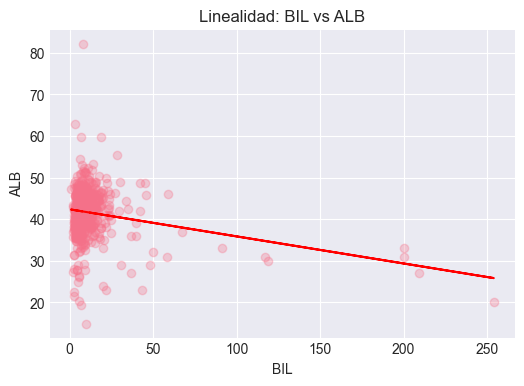

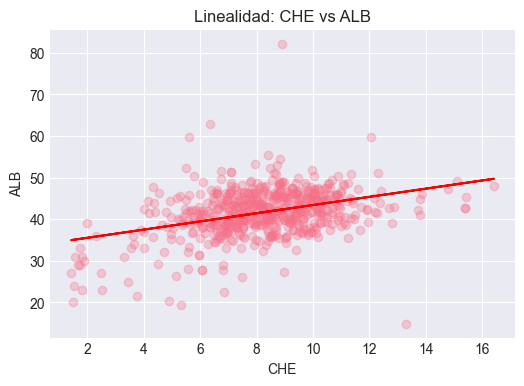

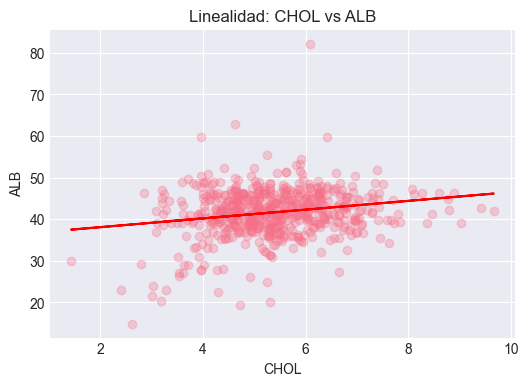

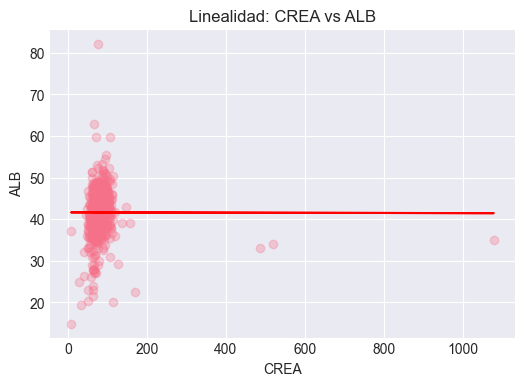

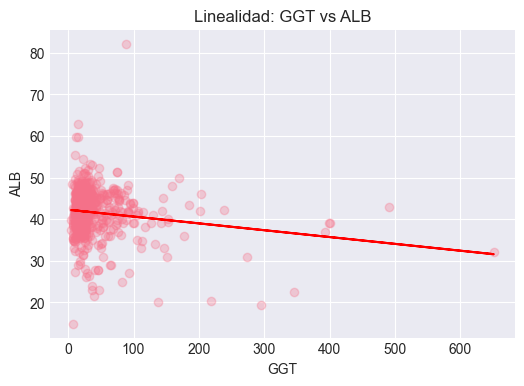

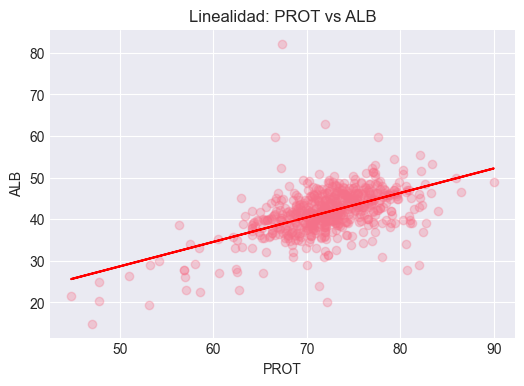

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


df = pd.read_csv("..\Datasets\hcvdat0.csv")

# Convertir columnas numéricas
numeric_cols = ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# Rellenar nulos con la mediana
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Codificación de variables categóricas
le_category = LabelEncoder()
le_sex = LabelEncoder()

df["Category"] = le_category.fit_transform(df["Category"])
df["Sex"] = le_sex.fit_transform(df["Sex"])


plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap="viridis")
plt.title("Matriz de correlación")
plt.show()

sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6, c=df["Category"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hepatitis Dataset - PCA")
plt.colorbar(label="Category")
plt.show()

print("Varianza explicada por cada componente PCA:", pca.explained_variance_ratio_)

target = "ALB"  

for col in numeric_cols:
    if col == target:
        continue

    X = df[[col]]
    y = df[target]

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(6,4))
    plt.scatter(X, y, alpha=0.3)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"Linealidad: {col} vs {target}")
    plt.show()
